# Feature Extraction 

**This Notebook was created by Badiaa Makhlouf [LikedIn](https://www.linkedin.com/in/b-m-b77032116/)**
 
For this notebook, I will be using the following libraries:

- pandas for data manipulation.
- numpy for mathematical operations.
- seaborn and matplotlib for data visualizing.
- sklearn for machine learning.


In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

Feature extraction aims to retain the most relevant information from the original data. This involves identifying features that contribute significantly to the variability and patterns within the dataset while discarding redundant or irrelevant information. Moreover, one of the primary goals of feature extraction is to reduce the dimensionality of the dataset. High-dimensional data can lead to the curse of dimensionality, making it challenging for models to generalize well. 

In this notebook, I will discuss all types of Feature Extraction that are the next:

 - **Principal Component Analysis (PCA):** A common technique that transforms data into a new set of 
      uncorrelated variables, capturing the maximum variance in the data.
      
 - **Singular Value Decomposition (SVD):** Used for matrix factorization and dimensionality reduction.
    
 - **Independent Component Analysis (ICA):** Separates a multivariate signal into additive, independent components.  Wavelet Transform: Decomposes signals into different frequency components.
      
 - **Bag-of-Words (BoW):** Commonly used in natural language processing to represent text data by counting the  frequency of words.
      
Furthermore, feature extraction is a fundamental aspect of data preprocessing in machine learning, playing a crucial role in transforming raw data into a format that enhances the performance of predictive models. The choice of feature extraction techniques depends on the characteristics of the data and the goals of the analysis or modeling task.      

## 1-  Principal Component Analysis (PCA)

PCA stands out as an unsupervised dimensionality reduction technique. it is not exclusively used for supervised algorithms in machine learning; it is commonly applied to both supervised and unsupervised machine learning tasks. PCA is primarily a dimensionality reduction technique that can be used as a preprocessing step to enhance the performance of various machine learning algorithms.


PCA serves primarily in two key use cases:

 - Data Visualization: Utilized for enhanced comprehension of variations, distributions, and correlations within high-dimensional data. PCA aids in visualizing complex datasets, providing valuable insights into the underlying patterns.
 - Algorithm Optimization: Applied to expedite machine learning algorithms during both training and testing phases, particularly beneficial when dealing with extensive datasets. PCA can significantly accelerate the learning process of algorithms that may otherwise exhibit slow training speeds.

Multiple methods and libraries are available for applying Principal Component Analysis (PCA). Some popular libraries include NumPy, SciPy, and scikit-learn. Here, I'll provide examples using scikit-learn and NumPy:

### 1.1- Using scikit-learn : `sklearn.decomposition.PCA()`

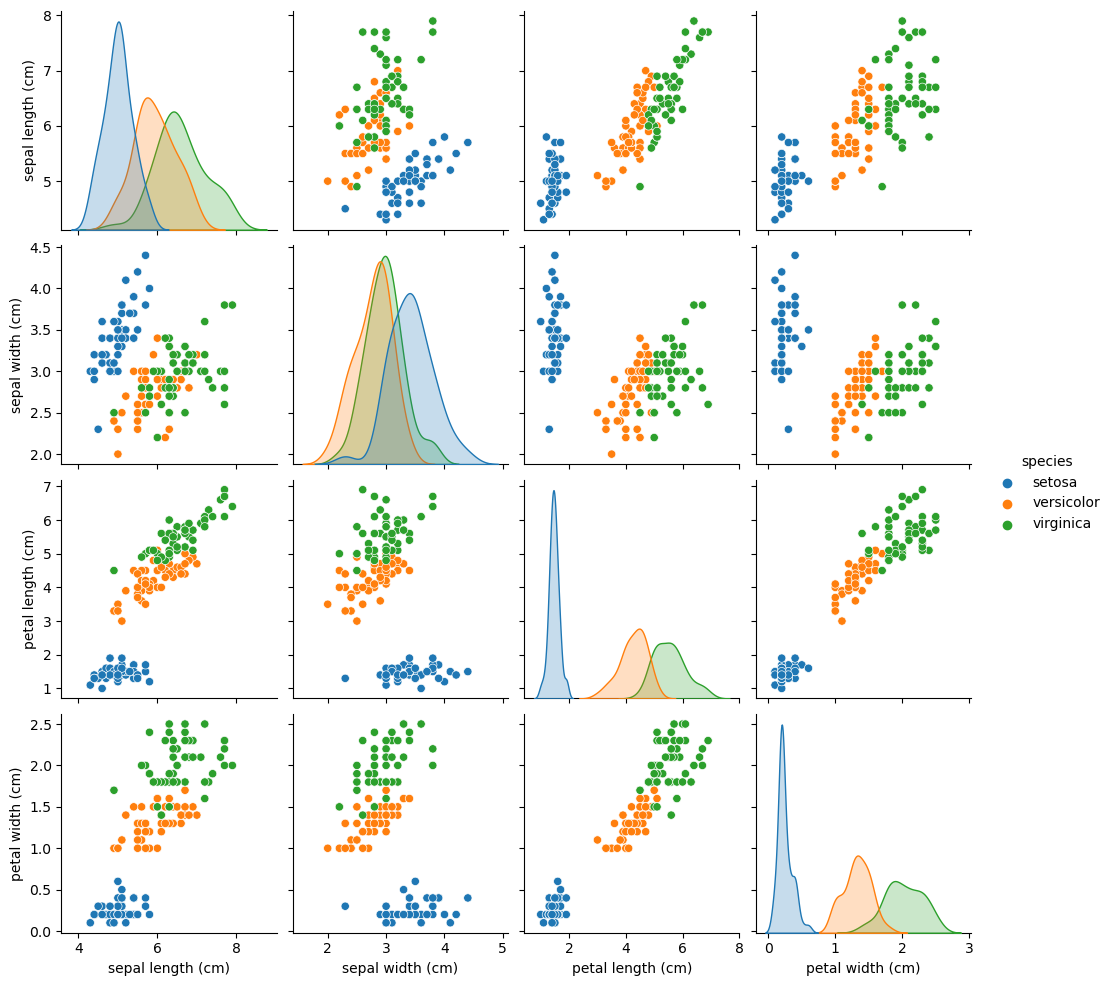

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Make a DataFrame with a target/species column
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names) # data without target
df_iris['species'] = iris.target_names[iris.target] # target

# Plot pairwise comparison to explore the data
sns.pairplot(df_iris, hue='species')

From the plots above, it is clear that we have :

 - Strong correlation between petal length and petal width.
 - versicolor and virginica are more similar to each other than to setosa
 
let's focus on these two parameters petal length and petal width while applying pca to explain how it works.

**Question: how to choose the number of PCA components?**


In [3]:
sklearn_pca = PCA()
# Pass the data to the fit method
sklearn_pca.fit(df_iris[iris.feature_names])
# Print the variance explained
print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)

Variance percent explained
 [0.92461872 0.05306648 0.01710261 0.00521218]


The optimal components number, for PCA, is 2 because it is clear that the first two components have almost 97% of data variability. We can see that the first component captures 92% of the variability in the data.

Here a second example how to get the number of components: 

In [4]:
cumsum = np.cumsum(sklearn_pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
d

2

The previous cell confirms the chosen optimal number of components: 2

In [5]:
# Apply PCA
sklearn_pca = PCA(n_components=2)  # Choose the number of components
X_pca = sklearn_pca.fit_transform(df_iris[iris.feature_names])

# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(sklearn_pca.transform(df_iris[iris.feature_names]),
                     columns=['PCA1', 'PCA2'])
# Create a column for species name
df_2D['species'] = df_iris['species']

# Look at the result
df_2D.head()

,PCA1,PCA2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47342/131707519.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df_2D.groupby(['species']):


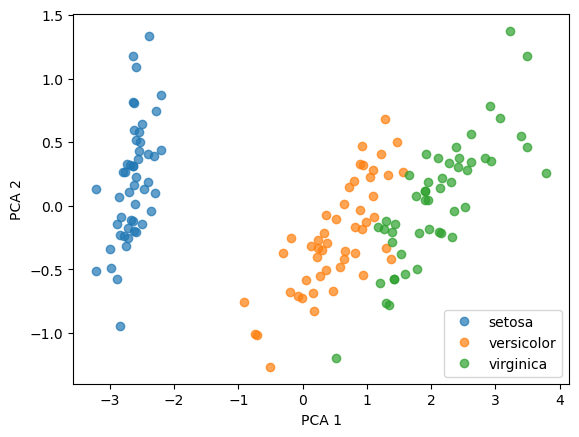

In [6]:
for key, group in df_2D.groupby(['species']):
    plt.plot(group.PCA1, group.PCA2, 'o', alpha=0.7, label=key)

# Tidy up plot
plt.legend(loc=0)
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

The plot above confirms the previous observations:

- versicolor and viriginica being more similar to each other than to setosa.
- The second axis (y-axis) PCA2, doesn't have much information regarding species

### 1.2- Using NumPy
In this case, I am going to compute the covariance matrix and use eigenvalue decomposition to obtain the eigenvectors and eigenvalues. Here are the steps to apply :
 - 1. Standardise the data
 - 2. Compute the covariance matrix and use eigenvalue decomposition to obtain the eigenvectors and eigenvalues.
 - 3. Select the k largest eigenvalues and their associated eigenvectors.
 - 4. Transform the data into a k dimensional subspace using those k eigenvectors.


In [7]:
# 1- Standardize the data
# Substract the mean from the measurements.
df_iris1=df_iris.loc[:, ['petal length (cm)', 'petal width (cm)']]
df_centered = df_iris1
for col in df_centered.columns:
    df_centered[col] -= df_centered[col].mean()

# Take a look
df_centered.head()

,petal length (cm),petal width (cm)
0,-2.358,-0.999333
1,-2.358,-0.999333
2,-2.458,-0.999333
3,-2.258,-0.999333
4,-2.358,-0.999333


In [8]:
# 1- Compute the covariance matrix and use eigenvalue decomposition to obtain the eigenvectors and eigenvalues.
cov_mat = np.cov(df_centered.transpose())
print('Covariance matrix \n', cov_mat)

Covariance matrix 
 [[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]


**Question: why do we need to find eigenvalues and eigenvectors?**

Because the principal component directions are given by the eigenvectors of the matrix, and the magnitudes of the components are given by the eigenvalues.

Here is the computation of the eigensystem:

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors\n', eig_vecs)
print('\nEigenvalues\n', eig_vals)

Eigenvectors
 [[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]

Eigenvalues
 [3.66123805 0.03604607]


By plotting the eigenvectors on top of our data, we can get insight regarding how principal components capture the data variation.

As I mentioned before, The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [10]:
# 3- Select the largest eigenvalues and their associated eigenvectors.
# Compute how much variance is explained by each principal component
print("""PCA 1: {0:.2f}% of the variance while PCA 2:  {1:.2f}% of the variance""".format(*tuple(eig_vals / np.sum(eig_vals) * 100)))

PCA 1: 99.03% of the variance while PCA 2:  0.97% of the variance


We know which eigenvector to take: the one with the largest eigenvalue. From the cell above, it is clear that PC1 has 99% of the data variability (eigenvalue) so we can Project our data from 2D space (petal length (cm) and petal width (cm)) into 1D space (PC1). 

In [12]:
# 4- Transform the data into a k-dimensional subspace using those k eigenvectors. In our case (1 dimension)
# Project data to our 1D space
df_1D = pd.DataFrame(np.dot(df_iris1, eig_vecs[:,0]), columns=['projection'])
# Add back the species column
df_1D['species'] = df_iris['species']
df_1D.head()

,projection,species
0,-2.561012,setosa
1,-2.561012,setosa
2,-2.653190,setosa
3,-2.468834,setosa
4,-2.561012,setosa


/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47342/2209137033.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df_1D.groupby(['species']):


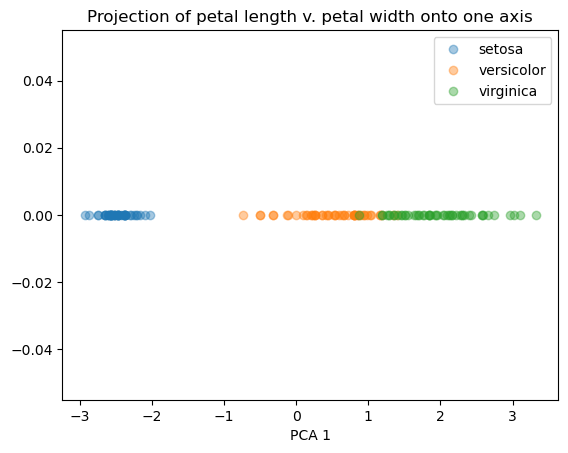

In [13]:
for key, group in df_1D.groupby(['species']):
    plt.plot(group['projection'], np.zeros_like(group['projection']), alpha=0.4,
             label=key, marker='o', linestyle='none')
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.legend(np.array(['setosa', 'versicolor','virginica']))
plt.title('Projection of petal length v. petal width onto one axis');

We have plotted our data in 1D only while maintaining ≈98% percent of the variability in the data!. 
In addition, we still have the previous information regarding versicolor and viriginica being more similar to each other than to setosa.

The new component PCA1 is in fact a weighted combination of petal length and petal width

## 2- Singular Value Decomposition (SVD):

Singular Value Decomposition (SVD) is a mathematical technique widely used in linear algebra and numerical analysis. 

It is a method for decomposing a matrix into three other matrices, which can be helpful in various applications, including signal processing, data analysis, and machine learning. The SVD of a matrix A is represented as:

$ A = U Σ V^T $ 
 

Here's a breakdown of the terms:

- A: The original matrix that we want to decompose.
- U: The left singular vectors matrix. Columns of U are the eigenvectors of $AA^T$ (covariance matrix of A).
- Σ: The diagonal matrix of singular values. The singular values are the square roots of the eigenvalues of $AA^T$ OR $A^TA$. They represent the magnitude of the singular vectors.

- $V^TV$: The transpose of the right singular vectors matrix. Columns of V are the eigenvectors of $A^TA$ (or $AA^T$) 
 

SVD has several applications and implications:

- **Dimensionality Reduction:** SVD can be used for reducing the dimensionality of data by keeping only the most significant singular values and their corresponding singular vectors. This is similar to the role of PCA in dimensionality reduction.

- **Image Compression:** In image processing, SVD can be applied for compressing images by retaining only a subset of the singular values and vectors.

- **Pseudo-Inverse:** SVD is used to compute the pseudo-inverse of a matrix, which is valuable in solving linear least squares problems.

- **Collaborative Filtering:** In recommendation systems, SVD can be used for collaborative filtering to make predictions about users' preferences.

- **Latent Semantic Analysis (LSA):** In natural language processing, SVD is employed for LSA to uncover relationships between terms and documents in a term-document matrix.

SVD is a powerful tool with a broad range of applications, and its efficient computation is facilitated by various numerical algorithms. Below are examples of applying Singular Value Decomposition (SVD) on the Iris dataset using both `scikit-learn` and `NumPy`
### 2.1- Using scikit-learn : `TruncatedSVD`

In [23]:
from sklearn.decomposition import TruncatedSVD

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target_names[iris.target] 

# Apply SVD with scikit-learn
svd = TruncatedSVD(n_components=2)  # Choose the number of components
X_svd_sklearn = svd.fit_transform(X)

In [33]:
# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(X_svd_sklearn,columns=['PCA1', 'PCA2'])
# Create a column for species name
df_2D['species'] = y

/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_47342/131707519.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df_2D.groupby(['species']):


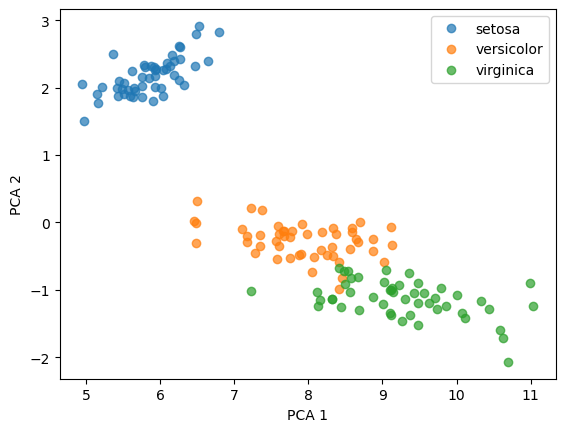

In [34]:
for key, group in df_2D.groupby(['species']):
    plt.plot(group.PCA1, group.PCA2, 'o', alpha=0.7, label=key)

# Tidy up plot
plt.legend(loc=0)
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

The same as before : versicolor and viriginica being more similar to each other than to setosa.

### PCA Versus SVD

PCA is a specific method for dimensionality reduction and data analysis, SVD is a more general matrix decomposition technique. PCA can be viewed as a special case of SVD when applied to the covariance matrix of the data. Both techniques have their applications and are widely used in various fields, often complementing each other in data analysis and modeling.

Here some key differences in their formulations and applications:

**Objective:**

- PCA: The primary goal of PCA is to find the principal components (or directions) along which the data
      varies the most. It achieves this by finding the eigenvectors and eigenvalues of the covariance matrix 
      of the data.
- SVD: SVD decomposes a matrix into three other matrices, capturing the inherent structure and 
       relationships within the data.
       
**Matrix Decomposition:**

- PCA: PCA is a specific application of SVD where the input matrix is the covariance matrix of the data.
- SVD: SVD is a more general matrix decomposition technique applicable to any matrix.
    
**Algorithmic Approach:**

- PCA: PCA is often implemented by computing the eigenvectors and eigenvalues of the covariance matrix. The principal components are then derived from these eigenvectors.
- SVD: SVD directly decomposes a matrix into three matrices:$A = UΣV^T$, where U and V are orthogonal matrices, and Σ is a diagonal matrix of singular values.
      
**Centering of Data:**

- PCA: PCA typically involves centering the data (subtracting the mean) before computing the covariance matrix.
- SVD: SVD can be applied directly to the original data matrix without the need for centering.
    
**Applications:**

- PCA: Commonly used for dimensionality reduction, data visualization, and noise reduction.
- SVD: Applied in a broader range of applications, including matrix inversion, image compression, collaborative filtering, and solving linear least squares problems.


## 3- Independent Component Analysis

## 4- Bag-of-Words (BoW)